<a href="https://colab.research.google.com/github/allineBrito/Pnad/blob/main/pns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns
low_memory = False

# ***PNS***

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Pasta sem nome/dadosPNS.csv', sep=",", encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (11,19,24,85,93,94,102,103,104,111,117,119,121,123,125,128,130,132,170,172,178,179,180,181,182,183,184,185,189,190,191,192,193,194,195,196,197,198,201,202,203,204,205,206,207,218,220,221,222,223,224,225,226,227,248,250,251,252,260,276,277,278,279,280,282,283,284,285,286,287,288,289,290,291,292,302,303,304,320,326,328,329,347,353,354,356,357,359,360,361,362,365,366,367,368,373,381,414,424,425,426,427,428,429,430,431,434,435,436,521,523,566,567,569,570,571,591,616,618,620,624,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,690,691,692,693,694,696,697,698,699,700,701,704,705,706,707,708,709,710,713,714,715,716,717,718,719,720,721,722,723,743,744,745,746,747,748,750,751,753,754,755,756,757,758,759,760,761,762,763,764,765,766,7

In [ ]:
data.info()

In [ ]:
print(dict(data.isnull().sum()))
data.isnull().sum()

In [ ]:
data.rename(columns={'C009':'Raça ou cor',
                     'V0001': "UF",
                     'P034' : "Pratica atividade fisica",
                     'Q092' : 'Diagnosticado com depressão?',
                    'J00402': 'Motivo da interrupção'
                
                   }, inplace=True)
data.head()

In [6]:
pd.options.display.float_format = '{:.0f}'.format

**População Total**

In [25]:
pd.pivot_table(data=data, values=['V00281'],
                aggfunc='sum', columns=['Raça ou cor']).transpose()

,V00281
Raça ou cor,
Amarela,1674691
Branca,91037722
Ignorado,14272
Indígena,990265
Parda,94086142
Preta,21786515


**População por UF**

In [29]:
pd.pivot_table(data,index=["UF"],values=["V00281"],columns=["Raça ou cor"],aggfunc=[np.sum],fill_value=0)

sum                                            
                     V00281                                            
Raça ou cor         Amarela   Branca Ignorado Indígena    Parda   Preta
UF                                                                     
Acre                   1976   169754        0     4673   619151   70912
Alagoas               20087   867488      240    11692  2216350  215987
Amapá                  3511   153721        0     4471   569949  106825
Amazonas              22034   677043        0    80678  3034222  173202
Bahia                 60309  2778014        0    98591  8262942 3657785
Ceará                 35212  2666374     3301    38899  5771702  617148
Distrito Federal      20580  1154294        0    12726  1471660  355895
Espírito Santo        22754  1560725      126    17644  1968360  448124
Goiás                 28911  2529665        0    42377  3771529  653623
Maranhão              29368  1422585      680    64392  4580545  946280
Mato Grosso           17089  1005460        0    11983  2076881  321134
Mato Grosso do Sul    39074  1186702      396    25231  1273814  185826
Minas Gerais          88230  8887271     1549    23941  9387734 2777870
Paraná               147171  7347279        0    29098  3413672  487497
Paraíba                3461  1394853        0    17002  2265562  316207
Pará                  19248  1456632      700    54430  6228053  809410
Pernambuco            43311  3180791     1550    53259  5520781  704904
Piauí                 11359   735242        0     7176  2170950  348357
Rio Grande do Norte    9887  1335427        0     9741  1886302  267913
Rio Grande do Sul     12175  8848766      530    42782  1589010  866958
Rio de Janeiro       100695  7721951        0    94270  6509367 2842330
Rondônia              14529   515882        0     7163  1057930  172314
Roraima                 919   107988        0    32304   347162   46826
Santa Catarina        71918  5707735        0    28375  1125401  224207
Sergipe                7808   523714        0    10128  1477184  281247
São Paulo            839023 26759543     5201   160964 14518349 3651322
Tocantins              4052   342824        0     6271   971579  236411

**Pratica atividade física**

In [45]:
pd.pivot_table(data,index=["UF", 'Pratica atividade fisica'],values=["V00281"],columns=["Raça ou cor"],aggfunc=[np.sum],fill_value=0)

sum                   \
                                              V00281                    
Raça ou cor                                  Amarela  Branca Ignorado   
UF                  Pratica atividade fisica                            
Acre                Não                          365   27593        0   
                    Sim                          463   18398        0   
Alagoas             Não                         2304  151013      240   
                    Sim                         5083   93898        0   
Amapá               Não                          679   17102        0   
                    Sim                          549   14612        0   
Amazonas            Não                         4242  115360        0   
                    Sim                         3236   70748        0   
Bahia               Não                        13712  519672        0   
                    Sim                        11881  377684        0   
Ceará               Não                         9472  443368      783   
                    Sim                         6795  311289      475   
Distrito Federal    Não                         1920  162997        0   
                    Sim                         6302  223545        0   
Espírito Santo      Não                         4714  301006        0   
                    Sim                         5952  246774        0   
Goiás               Não                         7522  461528        0   
                    Sim                         8774  332783        0   
Maranhão            Não                         7018  250406        0   
                    Sim                         2791  156920      340   
Mato Grosso         Não                         3378  205465        0   
                    Sim                         5244  134274        0   
Mato Grosso do Sul  Não                         8186  219069        0   
                    Sim                         6054  179533      396   
Minas Gerais        Não                        26280 1827163        0   
                    Sim                        16005 1342108        0   
Paraná              Não                        29947 1404566        0   
                    Sim                        36918 1180232        0   
Paraíba             Não                         1045  252446        0   
                    Sim                         1662  175708        0   
Pará                Não                         3861  262422        0   
                    Sim                         2311  143564      700   
Pernambuco          Não                        11739  626220        0   
                    Sim                         3437  404627        0   
Piauí               Não                         3305  121910        0   
                    Sim                          446   92477        0   
Rio Grande do Norte Não                         1940  219995        0   
                    Sim                         2708  174489        0   
Rio Grande do Sul   Não                         2185 1855736        0   
                    Sim                         1638 1510734      530   
Rio de Janeiro      Não                        20889 1718925        0   
                    Sim                        15313 1088437        0   
Rondônia            Não                         3873   98091        0   
                    Sim                         1970   65692        0   
Roraima             Não                          129   17288        0   
                    Sim                          137   12463        0   
Santa Catarina      Não                        21462 1154055        0   
                    Sim                         6619  940146        0   
Sergipe             Não                          856   93977        0   
                    Sim                         1701   72077        0   
São Paulo           Não                       182626 4566507      300   
                    Sim           

**Diagnóstico de depressão**

In [52]:
pd.pivot_table(data,index=["UF","Diagnósticado com depressão?","Raça ou cor"],values=["V00281"],aggfunc=[np.sum],fill_value=0)

sum
                                                   V00281
UF        Diagnósticado com depressão? Raça ou cor       
Acre      Não                          Amarela        827
                                       Branca       43162
                                       Indígena      1934
                                       Parda       175881
                                       Preta        24354
...                                                   ...
Tocantins Não                          Preta        81256
          Sim                          Branca        8288
                                       Indígena       433
                                       Parda        19716
                                       Preta         4814

[264 rows x 1 columns]

**Praticou algum exercicio físico?**

In [9]:
pd.pivot_table(data=data, values=['V00281'],
                aggfunc='sum', columns=['C009', 'P034']).transpose()

V00281
C009     P034         
Amarela  Não    373919
         Sim    309273
Branca   Não  17146115
         Sim  14185209
Ignorado Não      1324
         Sim      3916
Indígena Não    240689
         Sim    138544
Parda    Não  18731741
         Sim  11671192
Preta    Não   5053461
         Sim   3094074

**Qual foi o principal motivo de saúde que impediu ___ de realizar suas atividades habituais?**

In [58]:
pd.pivot_table(data=data, values=['V00281'],
                aggfunc='sum', columns=['Raça ou cor', 'Motivo da interrupção']).transpose()

V00281
Raça ou cor Motivo da interrupção                                     
Amarela     Câncer (inclusive quimioterapia/radioterapia)         1729
            Dengue, Chikungunya, Zika Vírus ou Febre amarela      2180
            Diabetes                                              4966
            Dor de cabeça ou enxaqueca                            9717
            Lesões ou fraturas provocada (s) por acidentes ...   14964
...                                                                ...
Preta       Problemas gineco-obstétricos (Problemas menstru...   47869
            Problemas neurológicos (Alzheimer/Esclerose/Doe...   35730
            Problemas nos ossos e articulações (Dor nas cos...  475377
            Problemas respiratórios (Resfriado / gripe /sin...  376109
            Saúde mental (Depressão/ bipolaridade/esquizofr...  112816

[72 rows x 1 columns]

Sexo    Percentual
Mulher          52
Homem           48


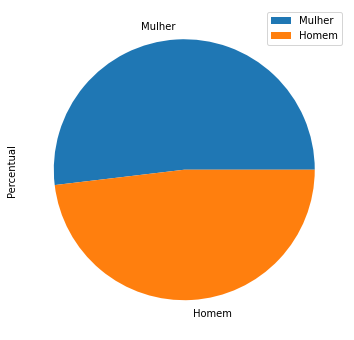

In [62]:
percent_sexo = data["C006"].value_counts(normalize="true") * 100

Leg_C006 = {1:"Homem", 2:"Mulher"}

df_sexo = pd.DataFrame({"Percentual":percent_sexo})

df_sexo.rename(index = Leg_C006, inplace = True)
df_sexo.rename_axis("Sexo", axis=1, inplace = True)

df_sexo.plot.pie(subplots=True, figsize=(6,6))

print(df_sexo)

***Possui plano de saúde? e como avalia a saúde? ***

In [ ]:
data.rename(columns={'I00102' : 'Plano de saúde médico particular',
                     'I001031':'Nº de ordem do titular',
                     'J001' :'Como é o estado de saúde?'
                
                   }, inplace=True)
data.head()

In [94]:
D_cobertura_saude = data[['id','Raça ou cor', 'UF', 'Plano de saúde médico particular', 'V00281' ,'Como é o estado de saúde?']]
D_cobertura_saude

,id,Raça ou cor,UF,Plano de saúde médico particular,V00281,Como é o estado de saúde?
0,0,Branca,Rondônia,Não,118,Regular
1,1,Parda,Rondônia,Não,118,Regular
2,2,Preta,Rondônia,Não,118,Regular
3,3,Preta,Rondônia,Não,118,Bom
4,4,Parda,Rondônia,Não,118,Bom
...,...,...,...,...,...,...
279377,279377,Branca,Distrito Federal,Não,633,Regular
279378,279378,Preta,Distrito Federal,Sim,633,Muito bom
279379,279379,Parda,Distrito Federal,Não,633,Muito bom
279380,279380,Branca,Distrito Federal,Não,633,Muito bom


***Qual foi o principal motivo de saúde que impediu ___ de realizar suas atividades habituais?***

In [ ]:
data.rename(columns={'I00102' : 'Plano de saúde médico particular',
                     'I001031':'Nº de ordem do titular',
                     'J001' :'Como é o estado de saúde?'
                
                   }, inplace=True)
data.head()

In [97]:
D_afetou_atividades = data[['id', 'UF', 'Raça ou cor', 'V00281' ,'Motivo da interrupção']]

D_afetou_atividades = D_afetou_atividades.dropna()
D_afetou_atividades

,id,UF,Raça ou cor,V00281,Motivo da interrupção
23,23,Rondônia,Branca,118,Problemas nos ossos e articulações (Dor nas co...
36,36,Rondônia,Parda,118,Problemas respiratórios (Resfriado / gripe /si...
53,53,Rondônia,Parda,146,Problemas gastrointestinais (Diarreia / vômito...
79,79,Rondônia,Parda,120,Problemas respiratórios (Resfriado / gripe /si...
122,122,Rondônia,Parda,120,Problemas gastrointestinais (Diarreia / vômito...
...,...,...,...,...,...
279322,279322,Distrito Federal,Parda,544,Problemas cardiovasculares (Pressão alta / doe...
279339,279339,Distrito Federal,Branca,544,Dor de cabeça ou enxaqueca
279347,279347,Distrito Federal,Branca,633,Outro problema de saúde
279352,279352,Distrito Federal,Branca,633,Problemas nos ossos e articulações (Dor nas co...


In [99]:
pd.pivot_table(data=D_afetou_atividades, values=['V00281'],
                aggfunc='sum', columns=['UF','Raça ou cor', 'Motivo da interrupção']).transpose()

V00281
UF        Raça ou cor Motivo da interrupção                                     
Acre      Amarela     Outro problema de saúde                                252
                      Problemas nos ossos e articulações (Dor nas cos...     113
          Branca      Dengue, Chikungunya, Zika Vírus ou Febre amarela       742
                      Diabetes                                               164
                      Dor de cabeça ou enxaqueca                             581
...                                                                          ...
Tocantins Preta       Problemas gineco-obstétricos (Problemas menstru...    1322
                      Problemas neurológicos (Alzheimer/Esclerose/Doe...     219
                      Problemas nos ossos e articulações (Dor nas cos...    5963
                      Problemas respiratórios (Resfriado / gripe /sin...    5537
                      Saúde mental (Depressão/ bipolaridade/esquizofr...     129

[1263 rows x 1 columns]

# ***TESTE***

In [ ]:
data.reset_index(inplace=True)
data.rename(columns={'index': 'id'}, inplace=True)
data

In [ ]:
dfpnadc18 = data[data["C008"] >= 18]

In [ ]:
novo_df = data[data['C008']>=18]

In [13]:
pd.pivot_table(data=data, values=['V00291'],
                aggfunc='sum', columns=['Q060']).transpose()               

,V00291
Q060,
Não,130577251
Sim,23588765


In [ ]:
pd.pivot_table(data=novo_df, values=['V00291'],
                aggfunc='sum', columns=['Q11406', 'C009', 'VDD004A']).transpose()  

V00291
Q11406 C009    VDD004A                                           
Não    Amarela Fundamental completo ou equivalente    1816.097000
               Médio completo ou equivalente         10494.963470
               Superior completo                     12735.775600
               Superior incompleto ou equivalente     4247.823000
       Branca  Fundamental completo ou equivalente  172059.331300
...                                                           ...
Sim    Preta   Médio completo ou equivalente        130399.122285
               Médio incompleto ou equivalente       37138.941800
               Sem instrução                         32534.558503
               Superior completo                     46693.290353
               Superior incompleto ou equivalente    26820.819300

[63 rows x 1 columns]

In [ ]:
bebida.to_csv("bebida.csv", encoding='ISO-8859-1')

In [ ]:
data["V00281"] = [str(x).replace(':',' ') for x in data["V00281"]]

In [ ]:
data['V00281'] = data['V00281'].apply(lambda x: float(x.replace(".","").replace(",",".")))